Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 11.1** | Prepare a Dataset for LSTM and CNN
**Name** | Buenafe, Dhafny S.
**Section** | CPE32S3
**Date Performed**: |May 10, 2024
**Date Submitted**: |May 11, 2024
**Instructor**: | Engr. Roman Richard

<hr>

### Mounting gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing libraries

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import statsmodels as s

%matplotlib inline

### Loading the dataset IBM

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HOA 11.1/IBM_2006-01-01_to_2018-01-01.csv')

###Pre-processing of the data

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


- showing the the first 5 rows

###Check for missing value

In [ ]:
data.isnull().sum()

Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

- Checking if there are missing data in the dataset

In [ ]:
data["Open"].fillna(data["Open"].mean(), inplace=True)
data["Low"].fillna(data["Low"].mean(), inplace=True)

- Filling datas in Open and Low column

In [ ]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

- Checking if there are still missing data

###Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)

In [ ]:
training_set = data[data['Date'] < '2017-01-01']
test_set = data[data['Date'] >= '2017-01-01']

- Splits the dataset into a training set containing data before January 1, 2017, and a test set containing data on or after January 1, 2017.

###Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(training_set['Close'].values.reshape(-1, 1))

###LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.

In [ ]:
X_train = []
y_train = []
timesteps = 60
for i in range(timesteps, len(train_scaled)):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

###Reshape the X_train for efficient modeling

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

###Plotting the dataset

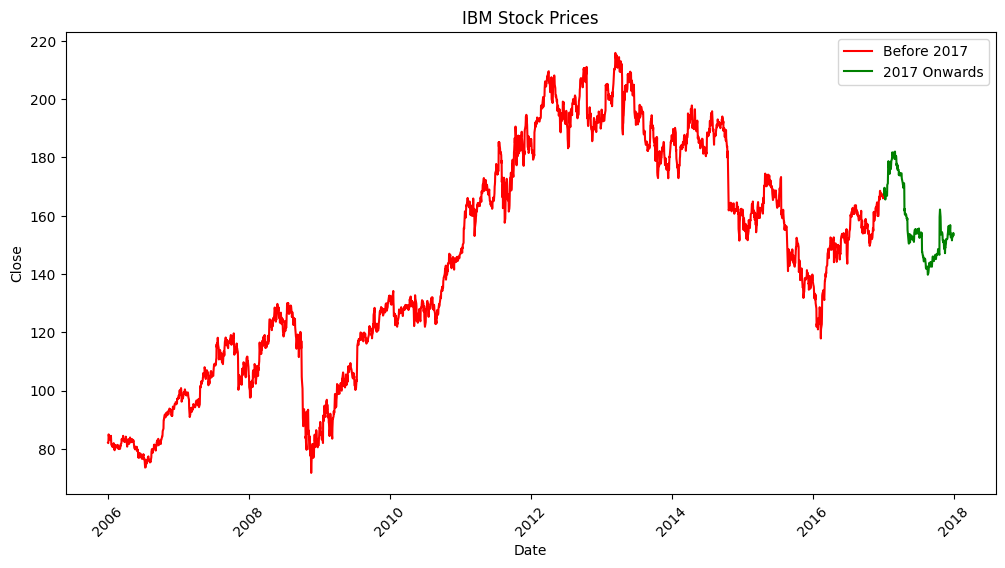

In [ ]:
import matplotlib.pyplot as plt

data_before_2017 = data[data['Date'] < '2017-01-01']
data_from_2017 = data[data['Date'] >= '2017-01-01']

plt.figure(figsize=(12, 6))


plt.plot(data_before_2017['Date'], data_before_2017['Close'],color='red', label='Before 2017')
plt.plot(data_from_2017['Date'], data_from_2017['Close'],color='green', label='2017 Onwards')

plt.title('IBM Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In this graph it shows the historical closing stock prices of IBM since 2006. The  y-axis shows the stock price and the x-axis shows the year. The stock price appears to have fluctuated between 80 dollar  and  220 dollar per share over the  period though there is a general upward trend. It’s difficult to say for certain from this graph but the price may have increased significantly in the last few years.

###Conclusion


After loading and examining the IBM stocks dataset from 2006 to 2018, I found 2 missing values. I divided the data into a training set containing records before 2017 and a test set containing records from 2017 onwards. Then, I scaled the training set using MinMaxScaler to range from 0 to 1. Following this, I structured the data with 60 timesteps and 1 output for LSTM modeling, reshaping the training data for efficiency. In conclusion, these steps ensure the preparation of the dataset for LSTM modeling, allowing for the prediction of IBM stock prices based on historical data. Convolutional Neural Networks (CNNs)is used for time series forecasting tasks like this stock price prediction given. CNNs can capture local patterns and dependencies within the input data, which can be advantageous for detecting important features in sequential data like stock prices.